In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('C:\\Users\\shana\\OneDrive\\Desktop\\DMT\\employee.csv')

In [ ]:
data.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [ ]:
data.shape

(1480, 38)

In [ ]:
data.EducationField.value_counts()

EducationField
Life Sciences       607
Medical             470
Marketing           161
Technical Degree    132
Other                83
Human Resources      27
Name: count, dtype: int64

In [ ]:
data.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1042
Travel_Frequently     279
Non-Travel            151
TravelRarely            8
Name: count, dtype: int64

In [ ]:
data.Department.value_counts()

Department
Research & Development    967
Sales                     450
Human Resources            63
Name: count, dtype: int64

In [ ]:
#0(No) : employee does not quit
#1(Yes) : employee quits the organisation
data.Attrition.value_counts(normalize=True)

Attrition
0    0.839189
1    0.160811
Name: proportion, dtype: float64

In [ ]:
x = data. drop(["Attrition"],axis=1)
y = data["Attrition"]

In [ ]:
#Encoding
x_dummies = pd.get_dummies(x)
x_dummies.head

<bound method NDFrame.head of       Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      18        230                 3          3              1   
1      18        812                10          3              1   
2      18       1306                 5          3              1   
3      18        287                 5          2              1   
4      18        247                 8          1              1   
...   ...        ...               ...        ...            ...   
1475   60        422                 7          3              1   
1476   60       1499                28          3              1   
1477   60       1179                16          4              1   
1478   60        696                 7          4              1   
1479   60        370                 1          4              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                405                        3          54               3   

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x_dummies,y,
                                                  test_size=0.3,random_state=80, stratify=y)

In [ ]:
y_train.value_counts(normalize=True)

Attrition
0    0.838803
1    0.161197
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

Attrition
0    0.84009
1    0.15991
Name: proportion, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=80)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=80)

In [ ]:
pd.Series(clf.feature_importances_,index = x_dummies.columns).sort_values(ascending=False).head(10)

OverTime_Yes            0.307039
MonthlyIncome           0.225342
YearsWithCurrManager    0.156404
StockOptionLevel        0.146687
Age                     0.101510
DailyRate               0.063018
EmployeeNumber          0.000000
EmpID_RM526             0.000000
EmpID_RM535             0.000000
EmpID_RM534             0.000000
dtype: float64

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:",cm, sep='\n')

Confusion Matrix is:
[[363  10]
 [ 60  11]]


In [ ]:
print("accuracy(in %):",metrics.accuracy_score(y_test, y_pred)*100)

accuracy(in %): 84.23423423423422


In [ ]:
metrics.f1_score(y_test,y_pred)

0.2391304347826087

In [ ]:
def compute_auc(test,train_instance):
    probs = train_instance.predict_proba(test)
    prob_positive = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test,prob_positive)
    roc_auc = auc(fpr,tpr)
    return roc_auc,fpr,tpr

In [ ]:
#Compute the area under the curve between fpr and tpr
roc_auc,fpr,tpr = compute_auc(x_test,clf)
roc_auc

0.706169995846392

In [ ]:
def plot_ROC(roc,fpr,tpr):
    plt.title("reciever Opereating characteristics")
    plt.plot(fpr,tpr,'red',label='AUC=%0.2f'%roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('false Positive Rate')
    plt.show()


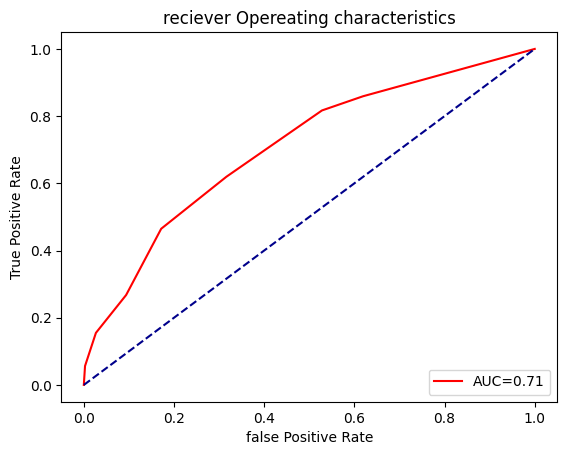

In [ ]:
plot_ROC(roc_auc,fpr,tpr)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
cols = x_dummies.columns

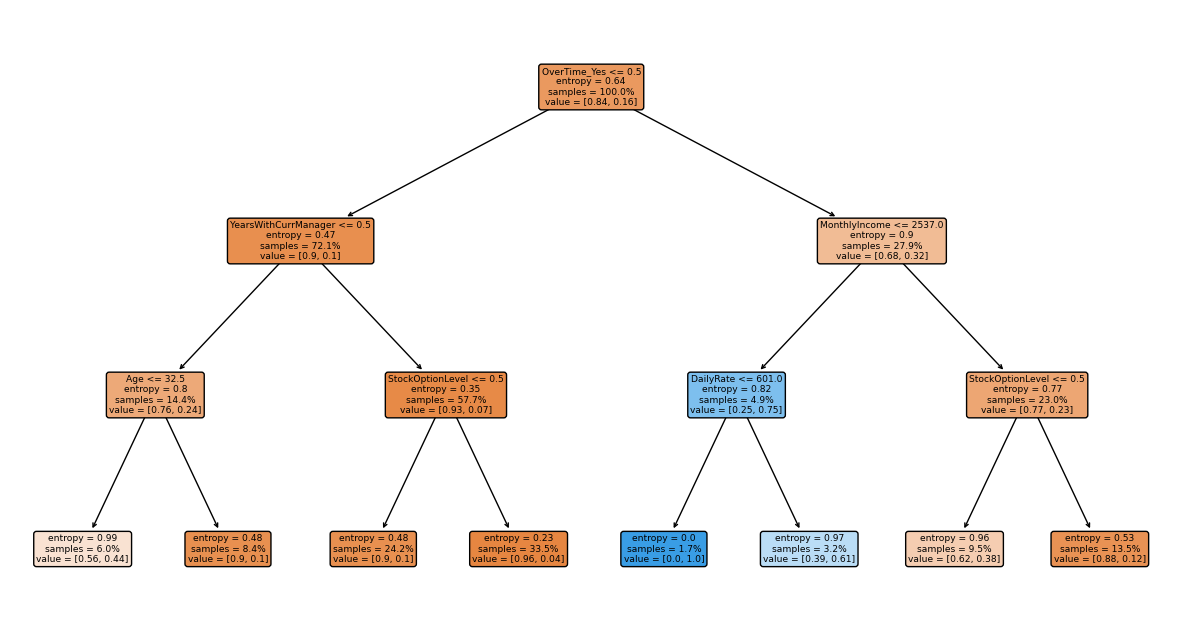

In [ ]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf, feature_names=cols, filled=True,precision=2,
              proportion=True,rounded=True)
plt.show()